<a href="https://colab.research.google.com/github/komalk98/indianfood/blob/main/indianfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np 
import plotly.express as px
from plotly.offline import init_notebook_mode
from matplotlib import pyplot as plt 
%matplotlib inline 
from wordcloud import wordcloud, ImageColorGenerator  

In [4]:
data = pd.read_csv('/content/sample_data/indian_food.csv')
data 

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [5]:
data.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North


In [6]:
data.columns 

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [8]:
data.isnull().any() 

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [9]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [10]:
data = data.replace(-1,np.nan)
data = data.replace('-1',np.nan)

In [11]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [12]:
data.shape 

(255, 9)

In [13]:
piedata = data.diet.value_counts().reset_index()
piedata

,index,diet
0,vegetarian,226
1,non vegetarian,29


In [14]:
piedata.columns = ['diet','count']
fig = px.pie(piedata, values='count', names='diet', title='veg and non-veg piechart', color_discrete_sequence=['black','red'])
fig.show()

In [15]:
cktime = data[['cook_time','name']]
cktime.head(10)

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun
5,50.0,Imarti
6,50.0,Jalebi
7,20.0,Kaju katli
8,30.0,Kalakand
9,40.0,Kheer


In [16]:
coktime = data[['cook_time','name']]
coktime.head(5)

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [17]:
# only where diet is non-veg and course is not euuals to dessert 

sweet_data = data[data['diet']=='non vegetarian']
final_sweet_data = sweet_data[sweet_data['course']!='dessert']

In [18]:
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10.0,40.0,spicy,main course,Assam,North East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,NaN,NaN,spicy,main course,Tripura,North East
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30.0,120.0,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10.0,35.0,spicy,main course,NCT of Delhi,North
79,Chicken razala,"Chicken, dahi, sesame seeds, garam masala powd...",non vegetarian,10.0,35.0,spicy,main course,West Bengal,East
80,Chicken Tikka masala,"Naan bread, tomato sauce, skinless chicken bre...",non vegetarian,10.0,50.0,spicy,main course,Punjab,North
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120.0,45.0,spicy,starter,Punjab,North
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240.0,30.0,spicy,main course,Punjab,North
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240.0,30.0,spicy,starter,Punjab,North


In [19]:
flavpro = data.flavor_profile.value_counts().reset_index()

In [20]:
flavpro

,index,flavor_profile
0,spicy,133
1,sweet,88
2,bitter,4
3,sour,1


In [21]:
flavpro.columns = ['flavor_profile','course']
figf = px.bar(flavpro, x='flavor_profile', y='course', title='variety of item according to the flovour', color_discrete_sequence=['green'])
figf.show()

In [22]:
ctime = data[['cook_time','name']]



In [23]:
ctime.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [24]:
ctime = ctime.sort_values(['cook_time'], ascending=True)
cktime = ctime.head(10)
 

In [25]:
cktime

,cook_time,name
109,2.0,Pani puri
111,5.0,Papad
11,5.0,Lassi
147,5.0,Papadum
212,6.0,Lilva Kachori
78,10.0,Chapati
169,10.0,Bajri no rotlo
195,10.0,Koshimbir
207,10.0,Surnoli
190,10.0,Keri no ras


In [26]:
cttime = cktime.cook_time.value_counts().reset_index()


In [27]:
cttime

,index,cook_time
0,10.0,5
1,5.0,3
2,2.0,1
3,6.0,1


In [28]:
cttime.columns = ['cook_time','name']
cfig = px.pie(cttime,names='name', values='cook_time', title='dishes based on cooking time', color_discrete_sequence=['red','black','grey'])
cfig.show()

In [29]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [33]:
cktimelong = ctime.sort_values(['cook_time'], ascending=False)
tenres = cktimelong.head(5)


In [34]:
tenres

,cook_time,name
62,720.0,Shrikhand
114,120.0,Pindi chana
27,120.0,Malapua
75,120.0,Biryani
130,90.0,Idli


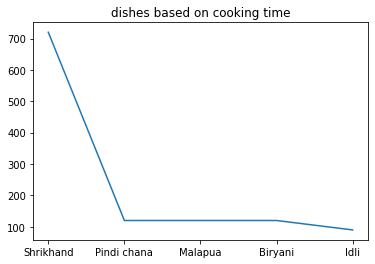

In [35]:
y=tenres['cook_time']
x=tenres['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()